In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('D:/LOANC.csv')
df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
...,...,...,...,...,...,...,...,...,...,...,...
887374,10000,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,Current,debt_consolidation
887375,24000,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,Current,home_improvement
887376,13000,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,Current,debt_consolidation
887377,12000,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,Current,debt_consolidation


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other


In [ ]:
df.shape

(887379, 11)

In [ ]:
df.describe

<bound method NDFrame.describe of         loan_amnt        term  int_rate  installment grade emp_length  \
0            5000   36 months     10.65       162.87     B  10+ years   
1            2500   60 months     15.27        59.83     C   < 1 year   
2            2400   36 months     15.96        84.33     C  10+ years   
3           10000   36 months     13.49       339.31     C  10+ years   
4            3000   60 months     12.69        67.79     B     1 year   
...           ...         ...       ...          ...   ...        ...   
887374      10000   36 months     11.99       332.10     B    8 years   
887375      24000   36 months     11.99       797.03     B  10+ years   
887376      13000   60 months     15.99       316.07     D    5 years   
887377      12000   60 months     19.99       317.86     E     1 year   
887378      20000   36 months     11.99       664.20     B  10+ years   

       home_ownership  annual_inc verification_status  loan_status  \
0                RE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  int64  
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 74.5+ MB


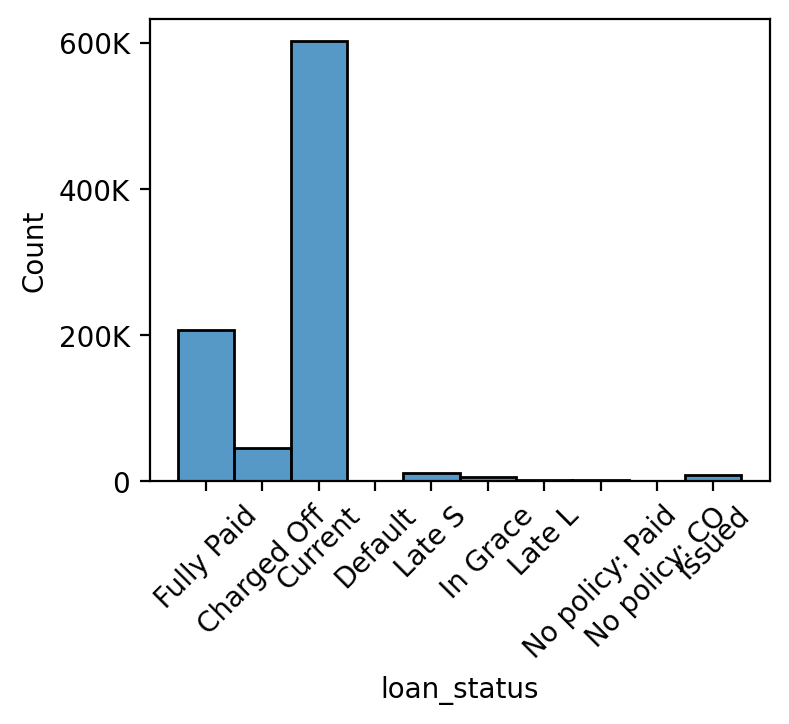

In [ ]:
plt.figure(figsize=(4, 3), dpi=200)

# Create a histogram using seaborn
sns.histplot(df.loan_status, kde=False)

# Specify the locations of the x-tick marks
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9], ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late S', 'In Grace','Late L', 'No policy: Paid', 'No policy: CO', 'Issued'])

plt.yticks([0, 200000, 400000, 600000], ['0','200K','400K','600K'])

# Rotate the x-labels by 45 degrees
plt.xticks(rotation=45)

plt.savefig('status.svg', format='svg')

# Show the plot
plt.show()


In [ ]:
df.isnull().sum().sort_values()/len(df) *100

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
home_ownership         0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
annual_inc             0.000451
emp_length             5.051393
dtype: float64

In [ ]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [ ]:
#Description of loan status
#Encoding loan status
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Issued'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.iloc[:,-2] = df['loan_status'].apply(classify_label)


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,0,credit_card
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,1,car
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,0,small_business
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,0,other
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,0,other


In [ ]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0



def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

df["grade"] = df["grade"].apply(SC_LabelEncoder1)
df["emp_length"] = df["emp_length"].apply(SC_LabelEncoder2)
df["home_ownership"] = df["home_ownership"].apply(SC_LabelEncoder3)

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,36 months,10.65,162.87,4,12,1,24000.0,Verified,0,credit_card
1,2500,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,1,car
2,2400,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,0,small_business
3,10000,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,0,other
4,3000,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,0,other
5,5000,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,0,wedding
6,7000,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,0,debt_consolidation
7,3000,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,0,car
8,5600,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,1,small_business
9,5375,60 months,12.69,121.45,4,1,1,15000.0,Verified,1,other


In [ ]:
df.annual_inc = df.annual_inc.fillna(0)

In [ ]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dtype: int64

# EXPLORATORY DATA ANALYSIS(EDA)

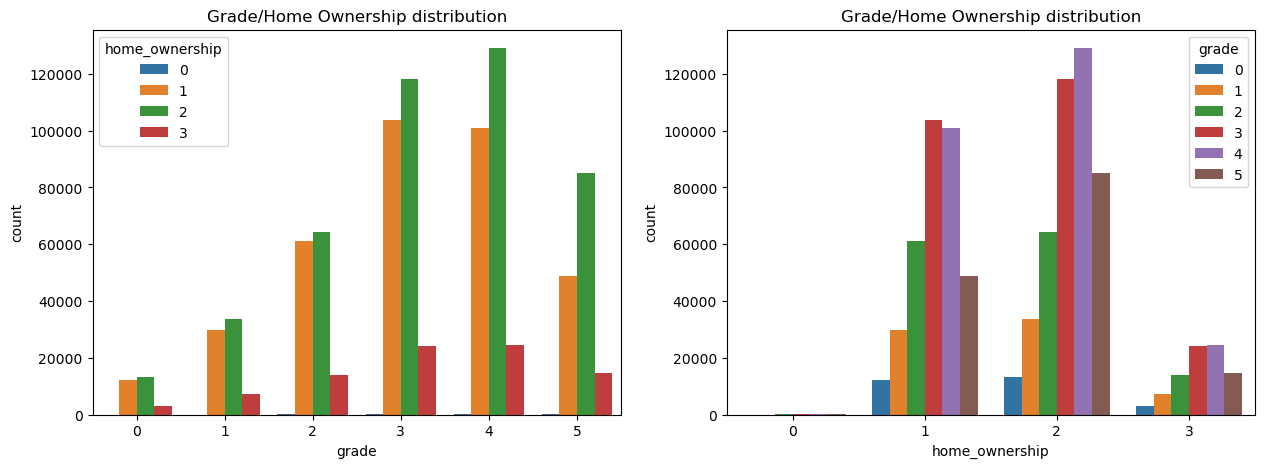

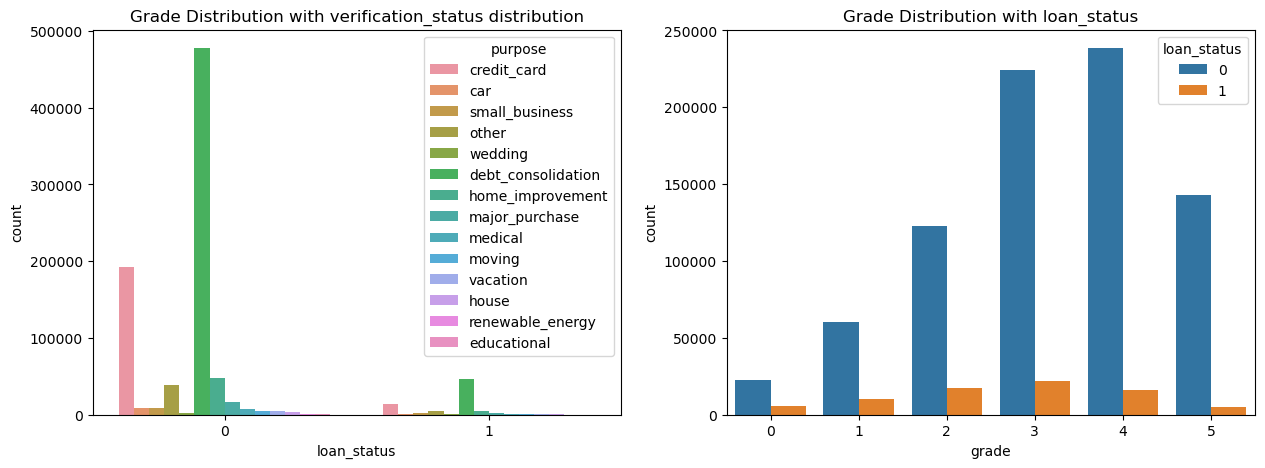

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='loan_status', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df, x='grade', hue='loan_status', ax=ax[1]).set_title("Grade Distribution with loan_status");

## Analysis
The number of Borrowers with high grade will be small compared to low grade
Most money borrowers' goals from labels 0 and 1 are debt consolidation
The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3


Text(0.5, 1.0, 'Loan amounts grouped by purpose')

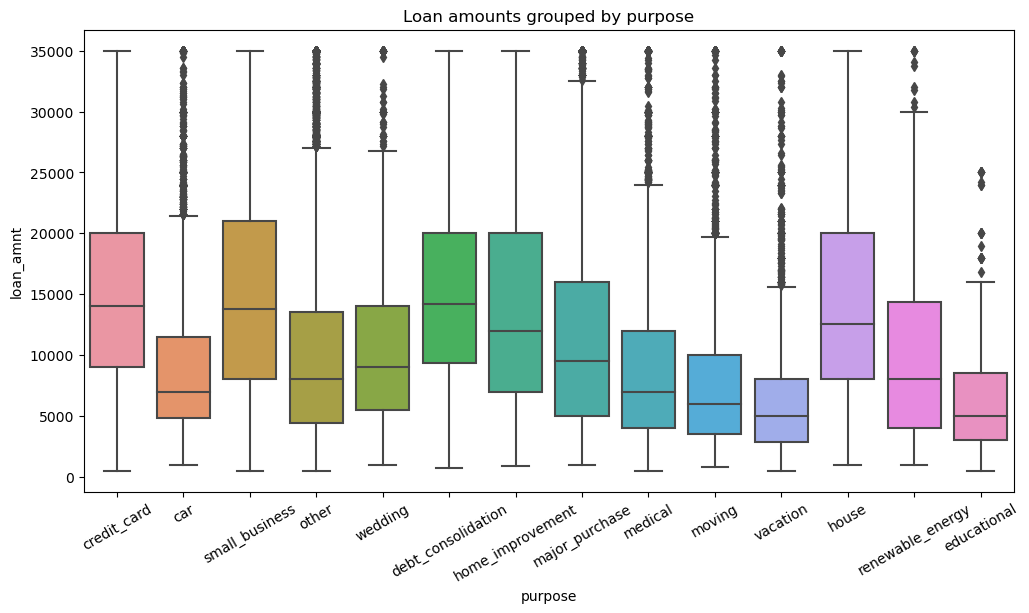

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

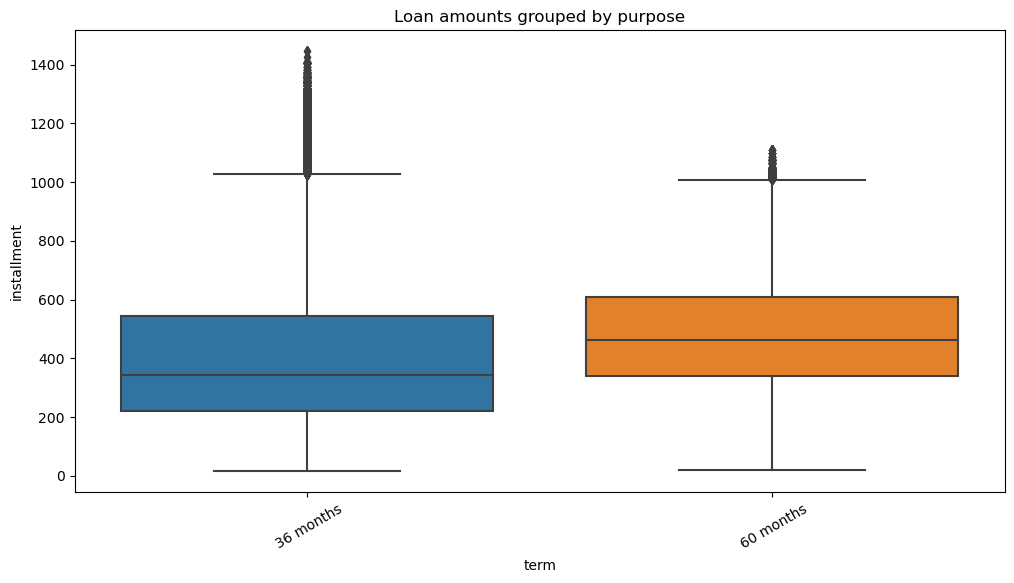

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='term', y='installment', data=df)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

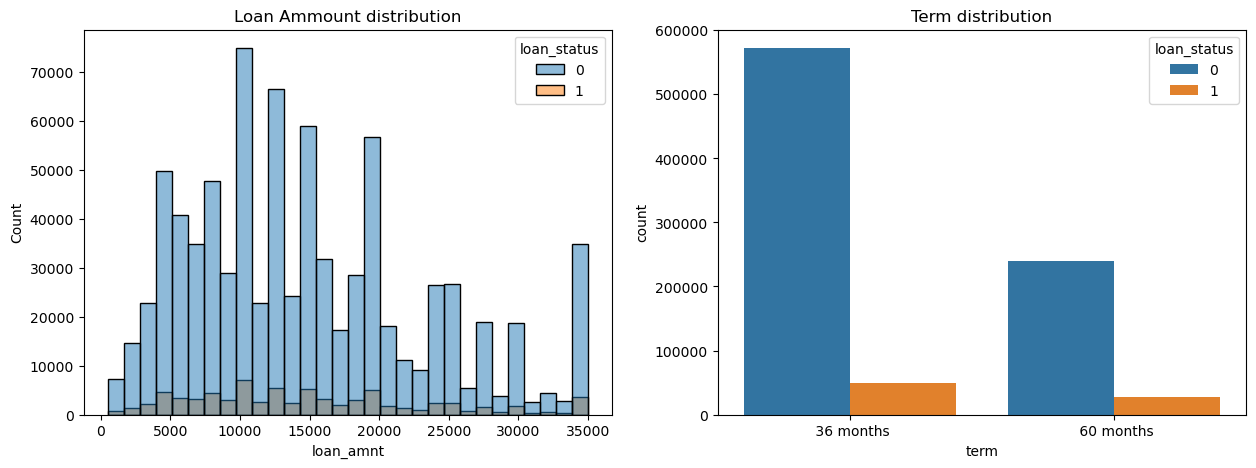

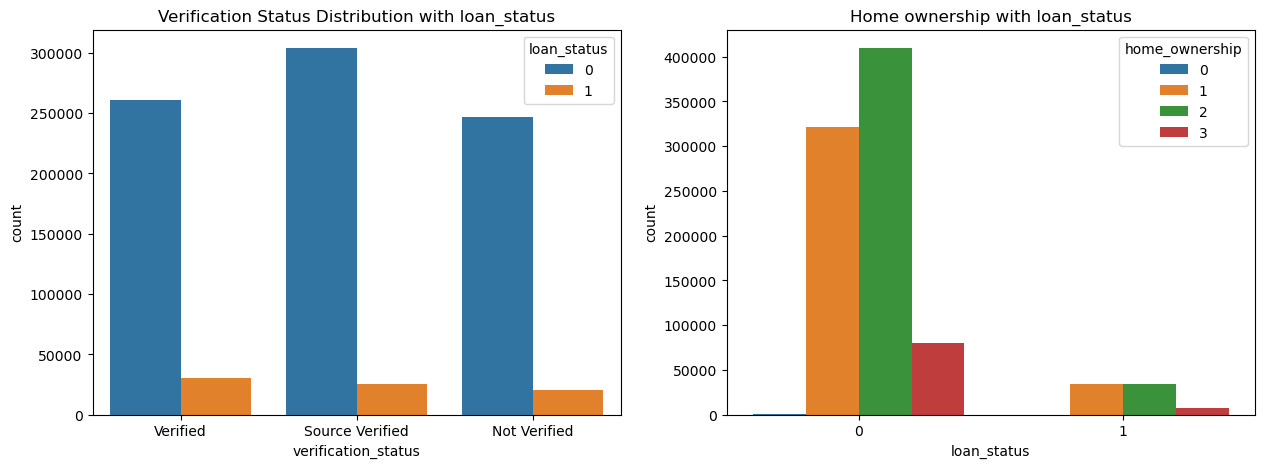

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='loan_amnt',hue="loan_status", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df, x='term', hue="loan_status", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, hue='home_ownership', x='loan_status', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df, x='verification_status', hue='loan_status', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

## analysis
The nominal value of the largest debt is 10000 USD
The maximum maturity is 36 months, while for 60 months it is almost a third
Most of the credits that can be paid in full are obtained from the "Verified" verification status


C:\Users\Praveena p\AppData\Local\Temp\ipykernel_12136\1188946961.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


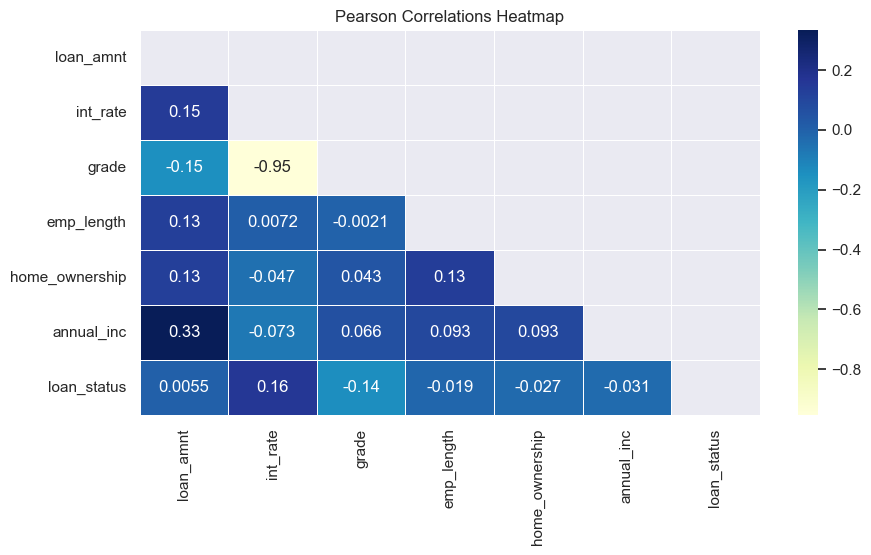

In [ ]:
#seeing the correlation

corr = df[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','loan_status']].corr()
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

## Analysis
 the credit is dependent on the annual income of the borrower

In [ ]:
# using LabelEncoder() to encode another category column:
from sklearn.preprocessing import LabelEncoder
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000,0,10.65,162.87,4,12,1,24000.0,2,0,1
1,2500,1,15.27,59.83,3,1,1,30000.0,1,1,0
2,2400,0,15.96,84.33,3,12,1,12252.0,0,0,11
3,10000,0,13.49,339.31,3,12,1,49200.0,1,0,9
4,3000,1,12.69,67.79,4,2,1,80000.0,1,0,9


In [ ]:

df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dtype: int64

# finding outliers

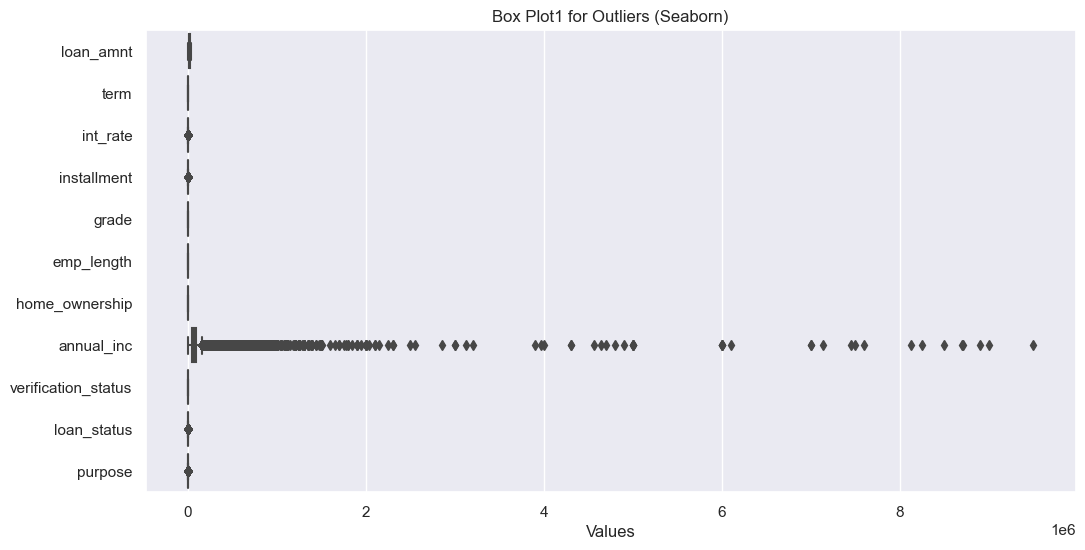

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.xlabel('Values')
plt.title('Box Plot1 for Outliers (Seaborn)')
plt.show()

Text(0.5, 0, 'Values')

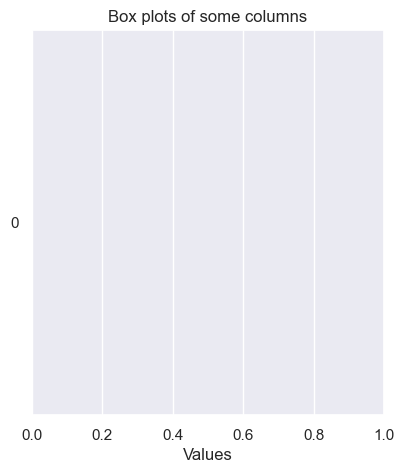

In [ ]:
def remove_outlier(df,column,lower_bound=0.25,upper_quartile=0.75):
  q1=df[column].quantile(lower_bound)
  q3=df[column].quantile(upper_quartile)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return df[(df[column]<=upper_bound) & (df[column]>=lower_bound)]
df_columns=["annual_inc"]
for column in df_columns:
  df=remove_outlier(df,df_columns)
plt.subplot(1,2,1)
sns.boxplot(df=df[df_columns],orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")


Text(0.5, 0, 'Values')

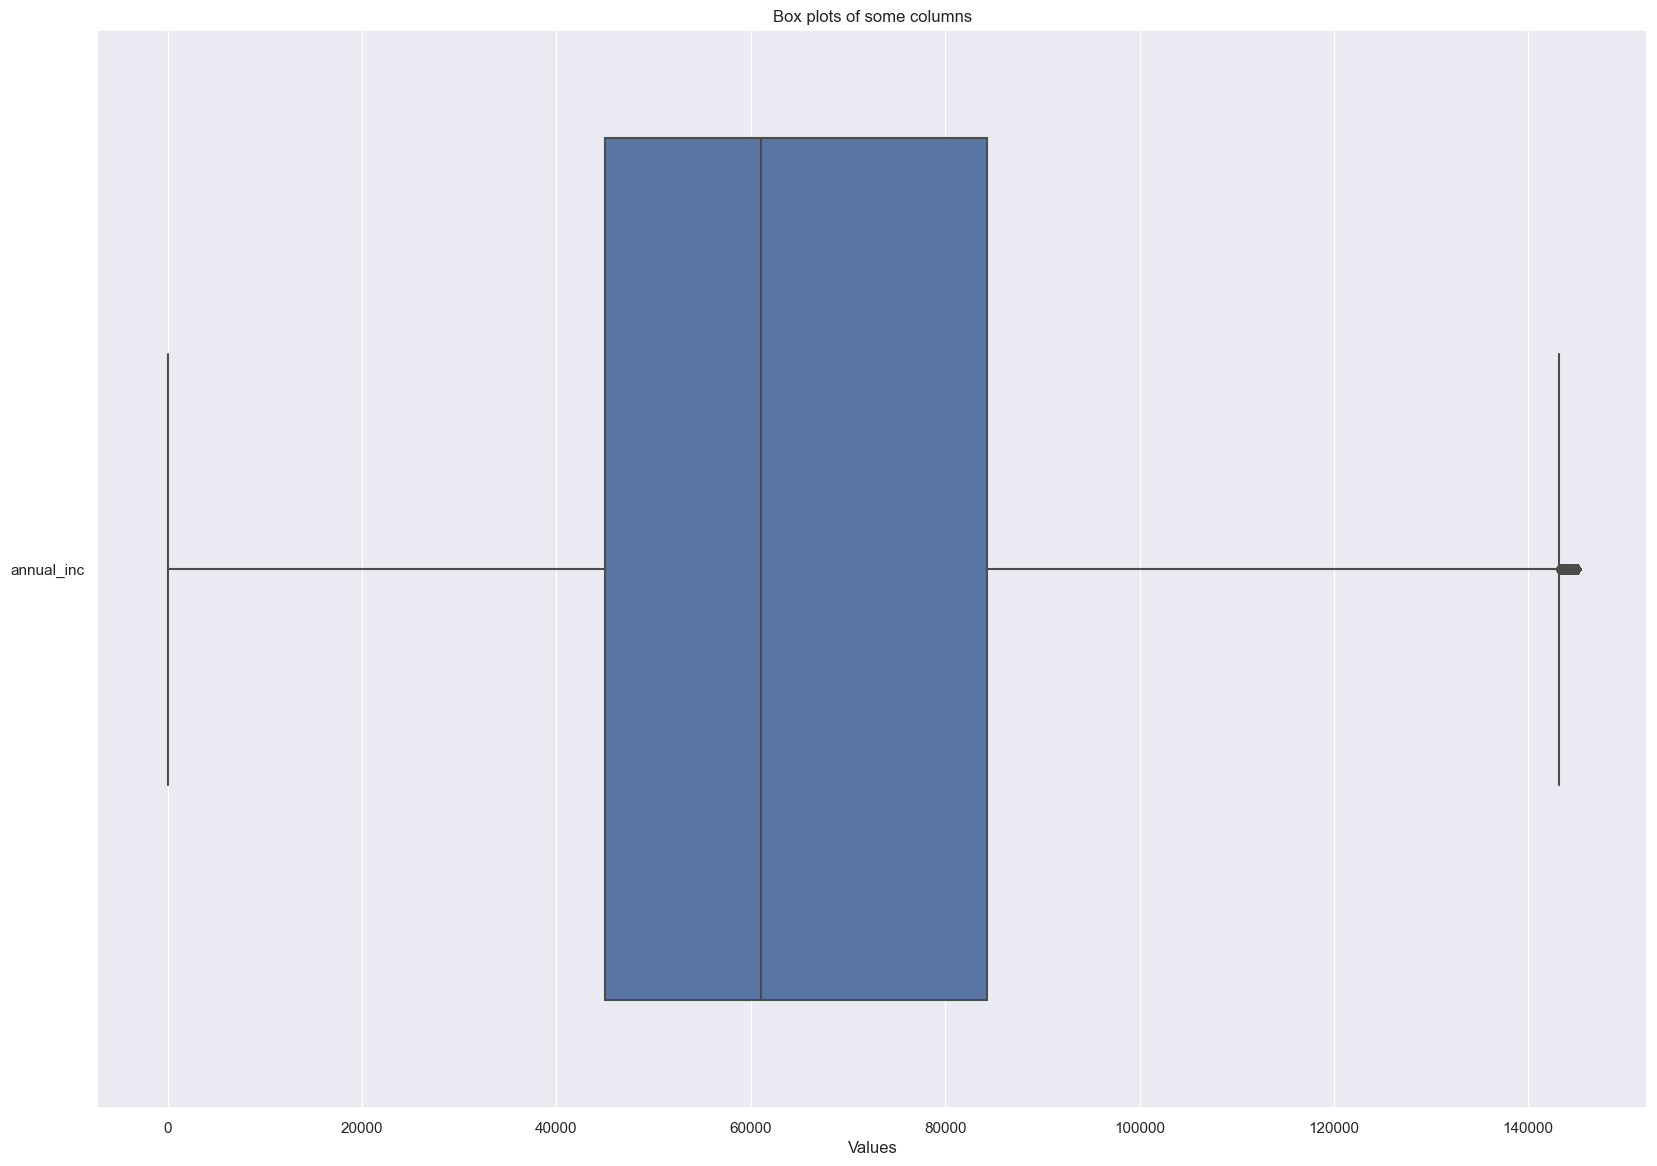

In [ ]:
df_columns=["annual_inc"]
for column in df_columns:
  df=remove_outlier(df,df_columns)
plt.figure(figsize=(20,14))
sns.boxplot(data=df[df_columns],orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")


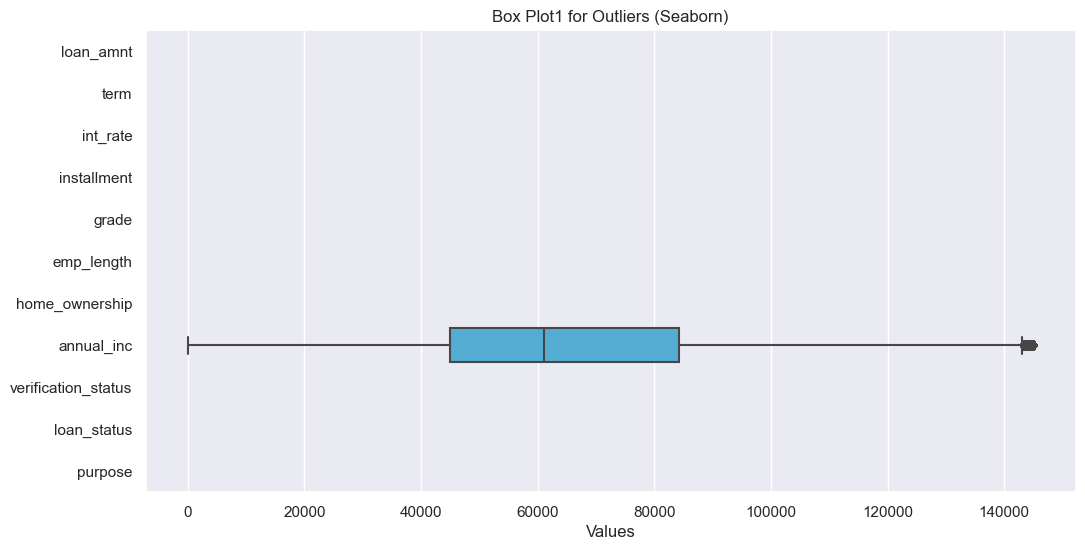

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.xlabel('Values')
plt.title('Box Plot1 for Outliers (Seaborn)')
plt.show()

## clustering


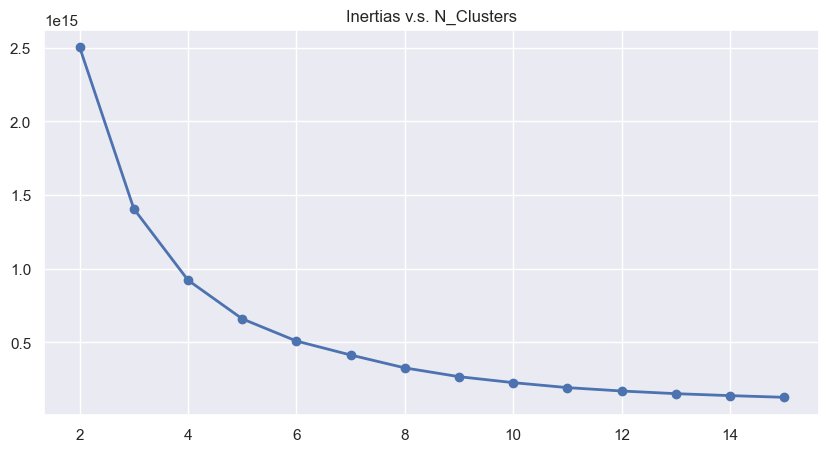

In [ ]:
from sklearn.cluster import KMeans
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

# Analysis:
"Elbow" on the chart above is at 4. The number of clusters must be 4

# knn model

In [ ]:
x=df.drop("loan_status", axis=1)
y=df["loan_status"]
x.shape

(887379, 10)

In [ ]:
y.shape

(887379,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

C:\Users\Praveena p\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, classification_report, accuracy_score
print(confusion_matrix(y_pred,y_test))

[[200990  18757]
 [  1757    341]]


In [ ]:
print(accuracy_score(y_pred,y_test))

0.90753003222971


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    219747
           1       0.02      0.16      0.03      2098

    accuracy                           0.91    221845
   macro avg       0.50      0.54      0.49    221845
weighted avg       0.98      0.91      0.94    221845



# gaussian naive bayes model


In [ ]:
x=df.drop("loan_status", axis=1)
y=df["loan_status"]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_predict=nb.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.913146566296288


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    221531
           1       0.00      0.23      0.01       314

    accuracy                           0.91    221845
   macro avg       0.50      0.57      0.48    221845
weighted avg       1.00      0.91      0.95    221845



In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_pred,y_test))

0.08685343370371205
